https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
https://www.kaggle.com/futurist/mapping-of-earthquake-and-its-analysis

In [1]:
# requires pandas to open csv
#
# Naive Bayes Algorithm: 
# Determine if we
import pandas
import csv
import random
#import numpy as np


with open('asia-data.csv', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(', '.join(row))

FileNotFoundError: [Errno 2] No such file or directory: 'asia-data.csv'

In [ ]:
def loadCsv(filename):
    lines = csv.reader(open(filename, "rb"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [ ]:
# deprecated
def loadDatasetOld(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        colnames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22']
        data = pandas.read_csv(filename,names=colnames)
        dataset = list(zip(data['2'], data['3'], data['5']))
        for x in range(len(dataset)):
            dataset[x] = list(dataset[x])        
        for x in range(len(dataset)):
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
                
#trainingSet=[]
#testSet=[]
#loadDataset(r'earthquakes-asia.csv', 0.66, trainingSet, testSet)
#print('Train: ' + repr(len(trainingSet)))
#print('Test: ' + repr(len(testSet)))

In [ ]:
def loadDataset(filename, split, trainingSet):
    with open(filename, 'r') as csvfile:
        colnames = ['1','2','3','4']
        data = pandas.read_csv(filename,names=colnames)
        dataset = list(zip(data['2'], data['3'], data['4']))
        for x in range(len(dataset)):
            dataset[x] = list(dataset[x])        
            for x in range(len(dataset)):
                for y in range(3):
                    dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [ ]:
# attempted solution for lat/long to float found in earthquake kaggle
m = Basemap(time='2018-08-28T22:35:13.410Z', Latitude_1= “-80”,Latitude_2= “80”, Longitude_1=”-180”,Latitude_1= “-80”, Magnitude=’5.0’, urcrnrlon=180, lat_ts=20, resolution='c')
earth_labels=earth_quake[["Location" ,"Latitude" ,"Longitude" , "Magnitude"]]
Latitudes = earth_labels[“Latitude”].tolist()
Longitudes = earth_labels[“Longitudes”].tolist()
x,y = m(Latitudes,Longitudes) 

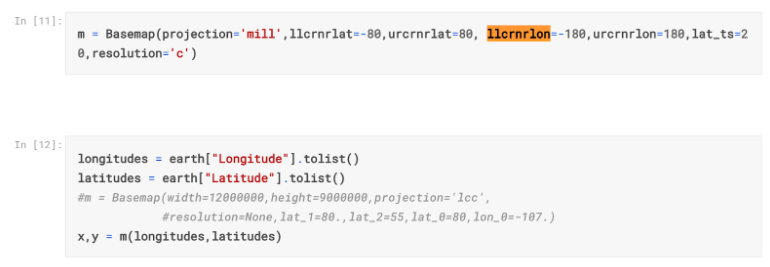

In [ ]:
trainingSet=[]
testSet=[]
loadDataset(r'asia-data.csv', 0.66, trainingSet)
print('Train: ' + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet)))

In [ ]:
# deprecated
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

#dataset = [[1], [2], [3], [4], [5]]
#splitRatio = 0.67
#train, test = splitDataset(dataset, splitRatio)
#print('Split {0} rows into train with {1} and test with {2}').format(len(dataset), train, test)

In [ ]:
def separateByClass(“asia-data.csv”):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [ ]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [ ]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)